In [5]:
from sklearn.datasets import load_files       

import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
from tensorflow.keras.utils import to_categorical

def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = to_categorical(np.array(data['target']), num_classes=139)
    return dog_files, dog_targets


# load train, test, and validation datasets
train_files, train_targets = load_dataset('/kaggle/input/dataset123/Dog Breed Classifier Udacity/train')
valid_files, valid_targets = load_dataset('/kaggle/input/dataset123/Dog Breed Classifier Udacity/valid')
test_files, test_targets = load_dataset('/kaggle/input/dataset123/Dog Breed Classifier Udacity/test')

# load list of dog names
dog_names = [item[21:-1] for item in sorted(glob("/kaggle/input/dataset123/Dog Breed Classifier Udacity/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 139 total dog categories.
There are 9549 total dog images.

There are 7371 training dog images.
There are 1089 validation dog images.
There are 1089 test dog images.


In [6]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True   

from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 1089/1089 [00:04<00:00, 241.38it/s]


In [7]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(139, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

optimizer = Adam(lr=0.0001) 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 20

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=32, callbacks=[checkpointer], verbose=1)


Epoch 1/20


2024-02-26 14:14:14.502310: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708956857.507622      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


231/231 [==============================] - ETA: 0s - loss: 4.9630 - accuracy: 0.0134
Epoch 1: val_loss improved from inf to 4.79514, saving model to saved_models/weights.best.from_scratch.hdf5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


231/231 [==============================] - 31s 109ms/step - loss: 4.9630 - accuracy: 0.0134 - val_loss: 4.7951 - val_accuracy: 0.0707
Epoch 2/20
230/231 [============================>.] - ETA: 0s - loss: 4.8153 - accuracy: 0.0234
Epoch 2: val_loss improved from 4.79514 to 4.60821, saving model to saved_models/weights.best.from_scratch.hdf5
231/231 [==============================] - 23s 102ms/step - loss: 4.8150 - accuracy: 0.0235 - val_loss: 4.6082 - val_accuracy: 0.0652
Epoch 3/20
230/231 [============================>.] - ETA: 0s - loss: 4.5571 - accuracy: 0.0493
Epoch 3: val_loss improved from 4.60821 to 4.47114, saving model to saved_models/weights.best.from_scratch.hdf5
231/231 [==============================] - 24s 102ms/step - loss: 4.5572 - accuracy: 0.0492 - val_loss: 4.4711 - val_accuracy: 0.0680
Epoch 4/20
230/231 [============================>.] - ETA: 0s - loss: 4.1896 - accuracy: 0.0901
Epoch 4: val_loss improved from 4.47114 to 4.39441, saving model to saved_models/weigh

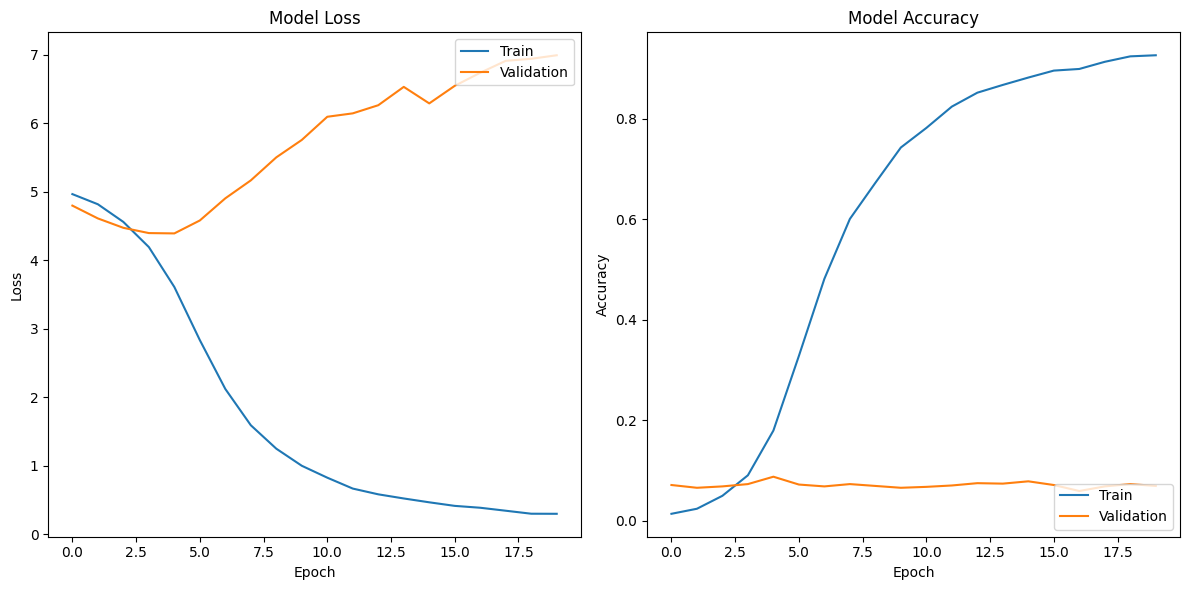

In [10]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [11]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [12]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 20ms/step
Test accuracy: 15.0597%
